In [ ]:
!pip install tensorflow==2.12 numpy==1.24.3 --force-reinstall

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install numpy==1.24.3 and tensorflow==2.12.0 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested numpy==1.24.3
    tensorflow 2.12.0 depends on numpy<1.24 and >=1.22

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd
import os
from google.colab import files

uploaded = '/content/drive/MyDrive/last/spectrogram.zip'
extract_dir = "/content/spectrogram"
with zipfile.ZipFile(uploaded, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
import os

folder_path = '/content/spectrogram'
count = 0

for root, dirs, files in os.walk(folder_path):
    count += len(files)

print(f"จำนวนไฟล์ทั้งหมด: {count}")

Class 'Am': 7 images
Class 'F': 20 images
Class 'B': 28 images
Class 'Bb': 24 images
Class 'Gag': 2 images
Class 'D': 38 images
Class '.ipynb_checkpoints': 0 images
Class 'Cm9': 3 images
Class 'Gm9': 2 images
Class 'C': 50 images
Class 'Eb': 43 images
Class 'G': 142 images
Class 'B9': 2 images
Class 'Bmaj7': 2 images
Class 'Dm': 6 images
Class 'Dm7': 1 images
Class 'Ebmaj7': 6 images
Class 'Cm7': 2 images
Class 'Cm': 10 images
Class 'D7': 1 images
Class 'Gm': 21 images
Class 'G7': 3 images
Class 'A': 6 images
Class 'Gm7': 2 images


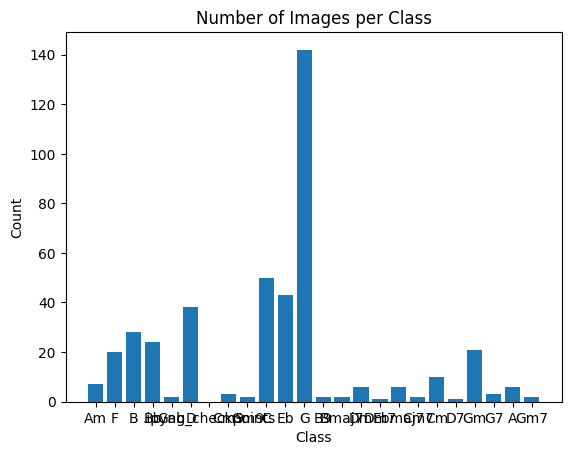

In [ ]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

path = Path("/content/dataset/test")
counts = {p.name: len(list(p.glob("*.png"))) for p in path.iterdir() if p.is_dir()}

for k, v in counts.items():
    print(f"Class '{k}': {v} images")

plt.bar(counts.keys(), counts.values())
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
import os
import random
import shutil
from pathlib import Path

def split_dataset(
    source_dir='all_spectrograms',
    target_dir='dataset',
    train_ratio=0.7,
    valid_ratio=0.2,
    test_ratio=0.1,
    seed=42
):
    random.seed(seed)
    source_dir = Path(source_dir)
    target_dir = Path(target_dir)

    for split in ['train', 'valid', 'test']:
        for class_dir in (source_dir.iterdir()):
            (target_dir / split / class_dir.name).mkdir(parents=True, exist_ok=True)

    for class_dir in source_dir.iterdir():
        if not class_dir.is_dir():
            continue
        images = list(class_dir.glob('*.png'))
        random.shuffle(images)

        total = len(images)
        train_cutoff = int(train_ratio * total)
        valid_cutoff = train_cutoff + int(valid_ratio * total)

        for i, img_path in enumerate(images):
            if i < train_cutoff:
                split = 'train'
            elif i < valid_cutoff:
                split = 'valid'
            else:
                split = 'test'

            dst = target_dir / split / class_dir.name / img_path.name
            shutil.copy(img_path, dst)

    print(f"Done!")

In [ ]:
split_dataset(
    source_dir='/content/spectrogram',
    target_dir='dataset',
    train_ratio=0.7,
    valid_ratio=0.2,
    test_ratio=0.1
)

Done!


In [ ]:
!pip install -q albumentations

In [ ]:
import os
import random
from pathlib import Path
from PIL import Image
import numpy as np
from tqdm import tqdm
import albumentations as A

base_path = Path("/content/dataset/train")

transform = A.Compose([
    A.RandomBrightnessContrast(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=10, p=0.5),
])

class_counts = {p.name: len(list(p.glob("*.png"))) for p in base_path.iterdir() if p.is_dir()}
max_count = max(class_counts.values())
print(f"Max images per class: {max_count}")

for class_name, count in class_counts.items():
    class_path = base_path / class_name
    image_paths = list(class_path.glob("*.png"))
    needed = max_count - count

    if needed > 0:
        print(f"Oversampling '{class_name}' by {needed} images...")
        for i in tqdm(range(needed), desc=f"Augmenting {class_name}"):
            src_path = random.choice(image_paths)
            image = np.array(Image.open(src_path).convert("RGB"))
            augmented = transform(image=image)["image"]
            aug_img = Image.fromarray(augmented)
            save_path = class_path / f"aug_{i}_{src_path.name}"
            aug_img.save(save_path)

print("Completed.")

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


Max images per class: 985
Oversampling 'Am' by 946 images...


Augmenting Am: 100%|██████████| 946/946 [01:06<00:00, 14.13it/s]


Oversampling 'F' by 850 images...


Augmenting F: 100%|██████████| 850/850 [01:01<00:00, 13.89it/s]


Oversampling 'B' by 796 images...


Augmenting B: 100%|██████████| 796/796 [00:54<00:00, 14.65it/s]


Oversampling 'Bb' by 817 images...


Augmenting Bb: 100%|██████████| 817/817 [01:03<00:00, 12.85it/s]


Oversampling 'Gag' by 971 images...


Augmenting Gag: 100%|██████████| 971/971 [01:07<00:00, 14.42it/s]


Oversampling 'D' by 729 images...


Augmenting D: 100%|██████████| 729/729 [00:51<00:00, 14.19it/s]


Oversampling 'Cm9' by 973 images...


Augmenting Cm9: 100%|██████████| 973/973 [01:07<00:00, 14.37it/s]


Oversampling 'Gm9' by 980 images...


Augmenting Gm9: 100%|██████████| 980/980 [01:08<00:00, 14.28it/s]


Oversampling 'C' by 638 images...


Augmenting C: 100%|██████████| 638/638 [00:44<00:00, 14.41it/s]


Oversampling 'Eb' by 694 images...


Augmenting Eb: 100%|██████████| 694/694 [00:50<00:00, 13.78it/s]


Oversampling 'B9' by 979 images...


Augmenting B9: 100%|██████████| 979/979 [01:09<00:00, 14.13it/s]


Oversampling 'Bmaj7' by 979 images...


Augmenting Bmaj7: 100%|██████████| 979/979 [01:12<00:00, 13.50it/s]


Oversampling 'Dm' by 950 images...


Augmenting Dm: 100%|██████████| 950/950 [01:05<00:00, 14.56it/s]


Oversampling 'Dm7' by 978 images...


Augmenting Dm7: 100%|██████████| 978/978 [01:14<00:00, 13.09it/s]


Oversampling 'Ebmaj7' by 947 images...


Augmenting Ebmaj7: 100%|██████████| 947/947 [01:08<00:00, 13.73it/s]


Oversampling 'Cm7' by 975 images...


Augmenting Cm7: 100%|██████████| 975/975 [01:04<00:00, 15.22it/s]


Oversampling 'Cm' by 923 images...


Augmenting Cm: 100%|██████████| 923/923 [01:04<00:00, 14.36it/s]


Oversampling 'D7' by 984 images...


Augmenting D7: 100%|██████████| 984/984 [01:01<00:00, 15.87it/s]


Oversampling 'Gm' by 842 images...


Augmenting Gm: 100%|██████████| 842/842 [00:57<00:00, 14.61it/s]


Oversampling 'G7' by 972 images...


Augmenting G7: 100%|██████████| 972/972 [01:10<00:00, 13.81it/s]


Oversampling 'A' by 947 images...


Augmenting A: 100%|██████████| 947/947 [01:07<00:00, 13.93it/s]


Oversampling 'Gm7' by 971 images...


Augmenting Gm7: 100%|██████████| 971/971 [01:10<00:00, 13.86it/s]

Oversampling + Augmentation Completed.


Class 'Am': 985 images
Class 'F': 985 images
Class 'B': 985 images
Class 'Bb': 985 images
Class 'Gag': 985 images
Class 'D': 985 images
Class 'Cm9': 985 images
Class 'Gm9': 985 images
Class 'C': 985 images
Class 'Eb': 985 images
Class 'G': 985 images
Class 'B9': 985 images
Class 'Bmaj7': 985 images
Class 'Dm': 985 images
Class 'Dm7': 985 images
Class 'Ebmaj7': 985 images
Class 'Cm7': 985 images
Class 'Cm': 985 images
Class 'D7': 985 images
Class 'Gm': 985 images
Class 'G7': 985 images
Class 'A': 985 images
Class 'Gm7': 985 images


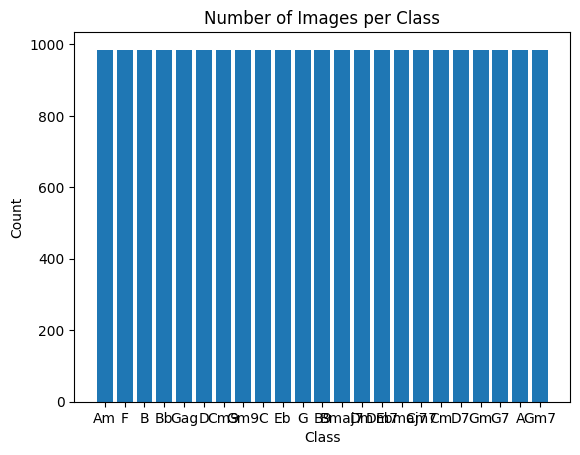

In [ ]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

path = Path("/content/dataset/train")
counts = {p.name: len(list(p.glob("*.png"))) for p in path.iterdir() if p.is_dir()}

for k, v in counts.items():
    print(f"Class '{k}': {v} images")

plt.bar(counts.keys(), counts.values())
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
import shutil
from google.colab import files

shutil.make_archive("dataset", 'zip', "dataset")

'/content/dataset.zip'